In [23]:
import numpy as np
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils

In [9]:
#loading data

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [10]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [12]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [13]:
Y_train[0]

5

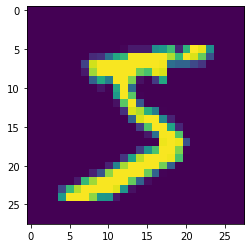

In [14]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0])

In [15]:
#reshaping dataset

X_train = X_train.reshape(60000,28,28,1).astype('float32')
X_test = X_test.reshape(10000,28,28,1).astype('float32')

In [16]:
#onehot encoding

number_of_classes = 10
Y_train = np_utils.to_categorical(Y_train,number_of_classes)
Y_test = np_utils.to_categorical(Y_test,number_of_classes)

In [17]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [18]:
#Creating Model

model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=(28,28,1),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))

model.add(Flatten())
model.add(Dense(number_of_classes,activation='softmax'))

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [21]:
#Model fit

model.fit(X_train,Y_train, validation_data=(X_test,Y_test),epochs=5,batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 226s 120ms/step - loss: 0.2539 - accuracy: 0.9513 - val_loss: 0.1059 - val_accuracy: 0.9685
Epoch 2/5
1875/1875 [==============================] - 216s 115ms/step - loss: 0.0699 - accuracy: 0.9790 - val_loss: 0.0959 - val_accuracy: 0.9714
Epoch 3/5
1875/1875 [==============================] - 215s 114ms/step - loss: 0.0475 - accuracy: 0.9850 - val_loss: 0.0674 - val_accuracy: 0.9805
Epoch 4/5
1875/1875 [==============================] - 185s 99ms/step - loss: 0.0368 - accuracy: 0.9883 - val_loss: 0.0894 - val_accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 173s 92ms/step - loss: 0.0308 - accuracy: 0.9907 - val_loss: 0.0821 - val_accuracy: 0.9808


In [22]:
#Observing metrics

metrics = model.evaluate(X_test,Y_test,verbose=0)
print("Accuracy : ",metrics)

In [26]:
#Predicting Output

prediction = model.predict(X_test[:4])
print("Prediction : ",prediction)

1/1 [==============================] - 0s 29ms/step
Prediction :  [[5.4161663e-15 1.1895082e-19 1.6905581e-15 7.9560816e-11 1.0289080e-18
  4.1405525e-16 1.8564118e-21 1.0000000e+00 2.9075500e-14 8.0740532e-11]
 [3.7739884e-08 1.3019406e-13 1.0000000e+00 2.8989604e-11 1.7980615e-13
  2.3910093e-15 5.2031641e-08 4.1179622e-17 8.6253137e-11 5.5496954e-19]
 [1.9516780e-15 9.9998844e-01 3.4832173e-09 1.2461180e-12 1.0323569e-05
  3.7996557e-09 3.5347564e-10 8.3696969e-09 1.2276499e-06 1.1421656e-09]
 [1.0000000e+00 1.3117026e-19 8.8752855e-13 2.5537063e-15 9.5364263e-16
  1.5818217e-13 2.2646673e-09 1.9078638e-12 1.2332553e-12 1.3277378e-10]]


In [27]:
print(np.argmax(prediction,axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [28]:
#Observing Metrics

metrics = model.evaluate(X_test,Y_test,verbose=0)
print("Metrics : ",metrics)

Metrics :  [0.08212301880121231, 0.9807999730110168]


In [29]:
#Saving the model

model.save("models/mnistCNN.h5")

Taking image as input to check results

In [2]:
from tensorflow.keras.models import load_model
from PIL import Image
import numpy as np

model = load_model("models/mnistCNN.h5")
filename = 'num'

img = Image.open(filename +'.png').convert("L")
img = img.resize((28,28))
im2arr = np.array(img)
im2arr = im2arr.reshape(1,28,28,1)
Y_pred = model.predict(im2arr)
print(Y_pred)


1/1 [==============================] - 0s 479ms/step
[[2.3916823e-01 2.2505474e-05 8.0647680e-04 5.4197997e-01 9.1105983e-05
  1.1143457e-02 2.9321743e-06 1.9486983e-01 1.9174109e-03 9.9981083e-03]]
